# 1-D mixture of distributions using numpy.random

This code example shows how to generate samples from a mixture of distributions.

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define distributions
Here the mixture is composed of two normal, $\mathcal{N}(-3, 2^2), \mathcal{N}(5, 2.5^2)$, and one uniform, $\mathcal{U}[1,3]$ distribution. They are stored in a list, with each distribution stored as a dictionary. The entries in the dictionary give the function name of the distirbution and the parameters. The parameters are themselves stored as a dictionary. https://docs.python.org/2/library/stdtypes.html#mapping-types-dict

In [2]:
distributions = [
    dict(type= np.random.normal, kwargs=dict(loc = -3, scale = 2)),
    dict(type= np.random.uniform, kwargs=dict(low = 1, high = 3)),
    dict(type= np.random.normal, kwargs=dict(loc = 5, scale = 2.5)),
]
num_distr = len(distributions)

## Define mixing coefficients
If necessary, the coefficients are scaled to add to one. An exception is raised if the number of coefficients is not equal to the number of distributuions.

In [3]:
coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()
num_coeff = len(coefficients)
if num_coeff != num_distr:
    raise Exception('number of mixing coefficients has to equal number of distributions')

## Generate samples

### Define sample size

In [4]:
sample_size = 10000

### Allocate storage space

In [5]:
data = np.zeros((sample_size, num_distr))

### Sample the distribution which generates each sample

In [6]:
mixing_idx = np.random.choice(len(coefficients), size=(sample_size,), replace=True, p=coefficients)

### Generate enough samples from each distribution
The code loops over the distributions. The function name is accessed via the "type" entry and the parameters via the "kwargs" entry. The function is called using keyword arguments (https://docs.python.org/3/tutorial/controlflow.html#keyword-arguments). The size is one additional argument.

In [7]:
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

### Choose the samples generated by the specified distributions
np.arange gives the indices 0 to sample_size-1, equivalent to Matlab 0:samplesize-1.

In [8]:
sample = data[np.arange(sample_size), mixing_idx]

### Plot histogram of samples

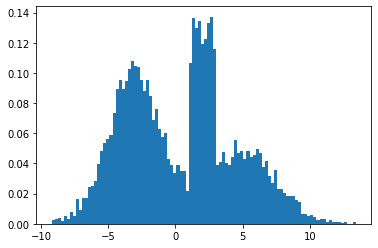

In [9]:
plt.hist(sample, bins=100, density=True)
plt.show()